In [72]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

from category_encoders import BinaryEncoder
from sklearn.preprocessing import StandardScaler

import umap.umap_ as umap


c:\Users\asaraiva\OneDrive - Capgemini\Documents\ROUTE25\11.1\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data_folder2 = "qws2"
data_folder1 = "qws1"
file_path2 = os.path.join(data_folder2, "qws2.txt")
file_path1 = os.path.join(data_folder1, "qws1.txt")
cleaned_file_path2 = os.path.join(data_folder2, "data.csv")
cleaned_file_path1 = os.path.join(data_folder1, "data1.csv")

In [55]:
# Read the file, skipping lines that start with #
with open(file_path2, "r") as f:
    lines = [line.strip() for line in f if not line.startswith("#") and line.strip() != ""]

ori_df = pd.DataFrame(lines)

ori_df = ori_df[0].str.split(",", expand=True)

ori_df = ori_df.drop(columns=11)

ori_df.columns = ["Response Time", "Availability", "Throughput", "Successability", "Reliability", "Compliance", "Best Practices", "Latency", "Documentation", "Service Name", "WSDL Address"]

ori_df.head(100)
ori_df.to_csv(cleaned_file_path2)


with open(file_path1, "r") as f:
    lines = [line.strip() for line in f if not line.startswith("#") and line.strip() != ""]

ori_df = pd.DataFrame(lines)

ori_df = ori_df[0].str.split(",", expand=True)

ori_df.columns = ["Response Time", "Availability", "Throughput", "Successability", "Reliability", "Compliance", "Best Practices", "Latency", "Documentation", "WsRF", "Class", "Service Name", "WSDL Address"]

ori_df.head(100)
ori_df.to_csv(cleaned_file_path1)


 Format: QWS parameters are separated by commas (first nine)		##
 Format: (1) Response Time						##
 Format: (2) Availability						##
 Format: (3) Throughput						##
 Format: (4) Successability						##
 Format: (5) Reliability						##
 Format: (6) Compliance						##
 Format: (7) Best Practices						##
 Format: (8) Latency							##
 Format: (9) Documentation						##
 Format: (10) Service Name						##
 Format: (11) WSDL Address						##Documentation

In [4]:
# Load data
df2 = pd.read_csv(cleaned_file_path2, index_col=0)  
df1 = pd.read_csv(cleaned_file_path1, index_col=0)  

df = df1
print(len(df))
df.head()

364


,Response Time,Availability,Throughput,Successability,Reliability,Compliance,Best Practices,Latency,Documentation,WsRF,Class,Service Name,WSDL Address
0,45.00,83,27.2,50,97.4,89,91,43.00,58,100,1,DictionaryService,http://www.mindswap.org/2002/services/Dictiona...
1,71.75,100,14.6,88,85.5,78,80,64.42,86,93,1,MyService,http://mydispatch.com/myservice.asmx?wsdl
2,117.00,100,23.4,83,88.0,100,87,111.00,59,90,1,aba,http://www.quentinsagerconsulting.com/wsdl/aba...
3,70.00,100,5.4,83,79.3,100,75,63.00,91,90,1,AlexaWebSearch,http://wsearch.amazonaws.com/doc/2007-03-15/We...
4,105.20,100,18.2,80,92.2,78,84,104.60,91,90,1,ErrorMailer,http://www.errormail.net/EM/ErrorMailer.asmx?wsdl


- Dtypes and Nulls

there are no empty values

In [60]:
for col in df.columns:
    print(col)
    print(df[col].dtypes)
    print("Null:", df[col].isna().mean() * 100)
    print(df[col].unique())
    print('- - -')

Response Time
float64
Null: 0.0
[   45.       71.75    117.       70.      105.2     224.       99.2
   108.2     125.2     110.3     105.4     129.      124.92    114.
   125.44    136.07    132.      122.      129.67     96.      109.09
    77.86    165.       50.       75.      159.      126.2     125.75
   111.      175.      130.      327.5     145.62    126.77    132.12
   135.      180.      166.11    150.45    138.13    238.      169.33
   134.      136.5      77.5     158.17    119.      122.12   1442.
   225.36    197.      113.5     164.      479.      167.67    134.34
   136.88    167.6     133.5     125.5     171.6      65.28    117.27
   164.5     113.8     163.8     129.34    168.      144.      141.5
   118.5     179.46    104.       87.48    168.17    158.      267.37
   401.      102.      156.      266.89    317.      120.      433.5
   118.      130.5     211.       92.5     256.5     463.      187.
   163.5     110.5      99.      232.25    154.66    222.      215.

- Histograms

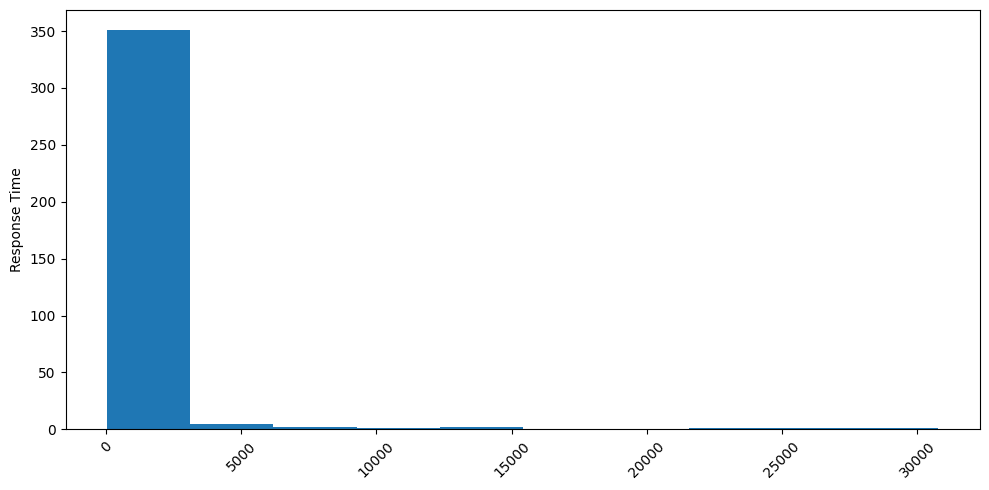

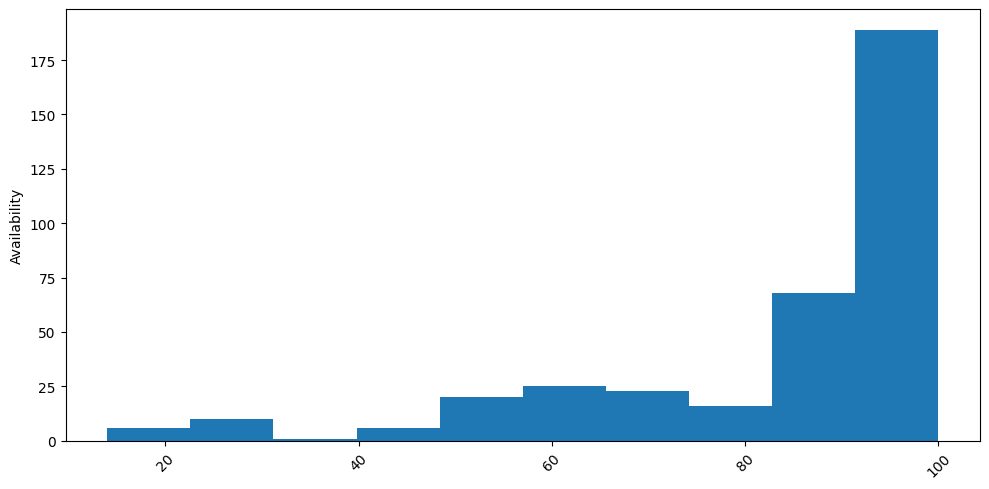

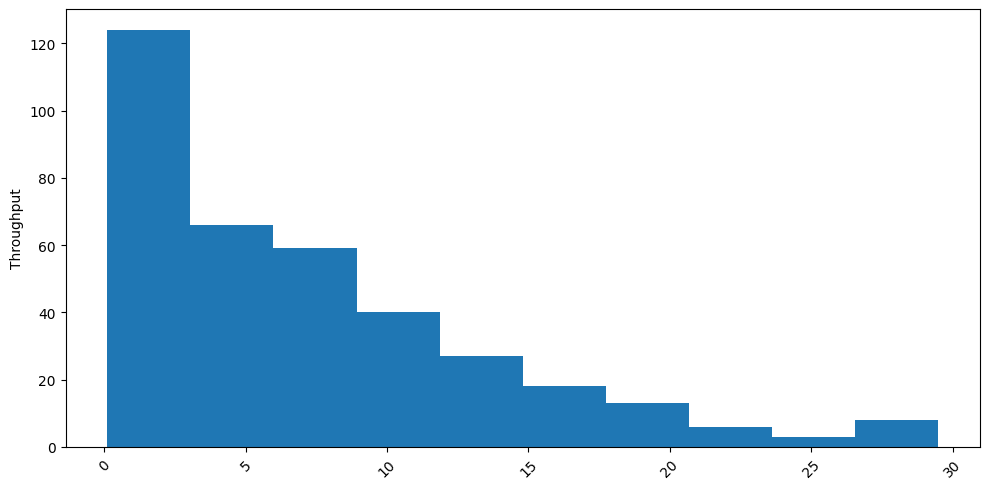

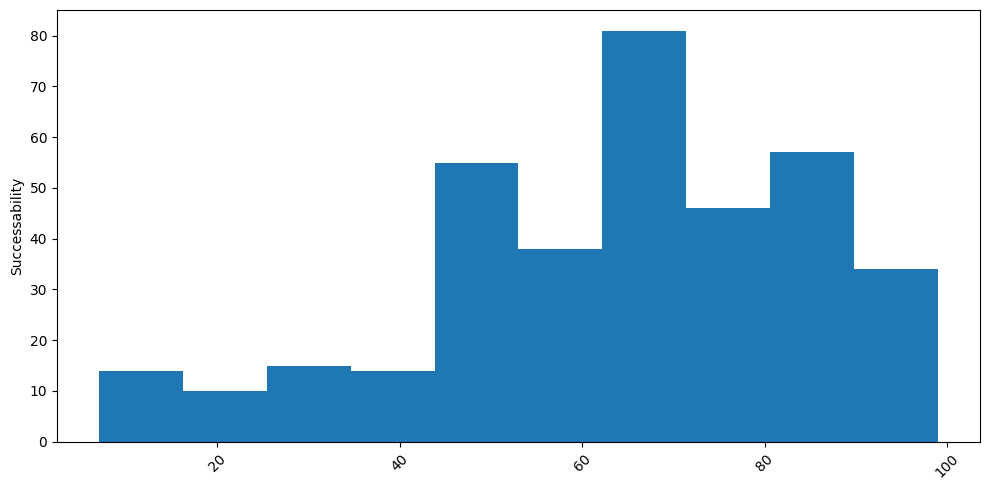

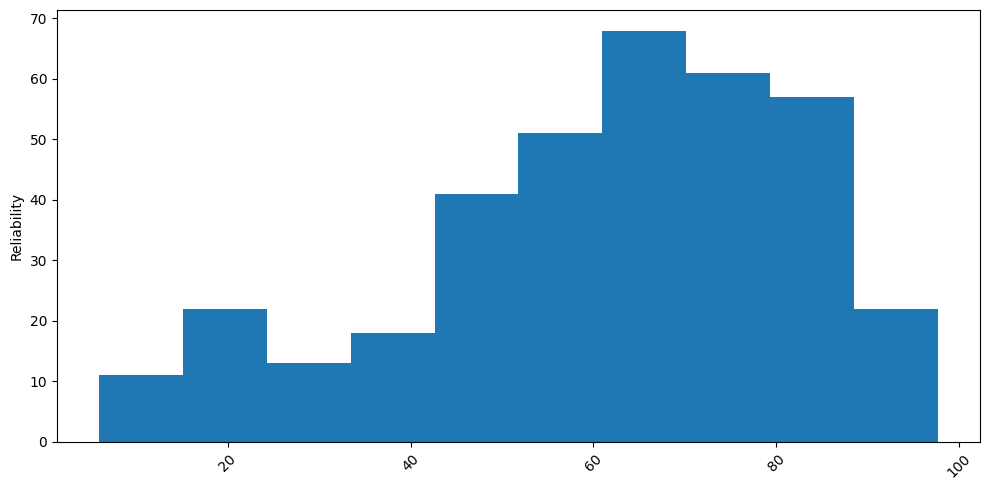

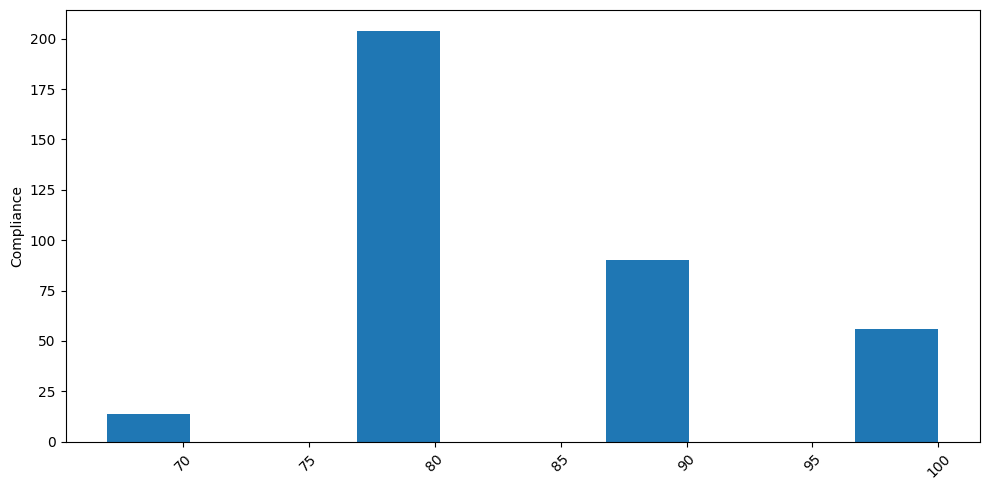

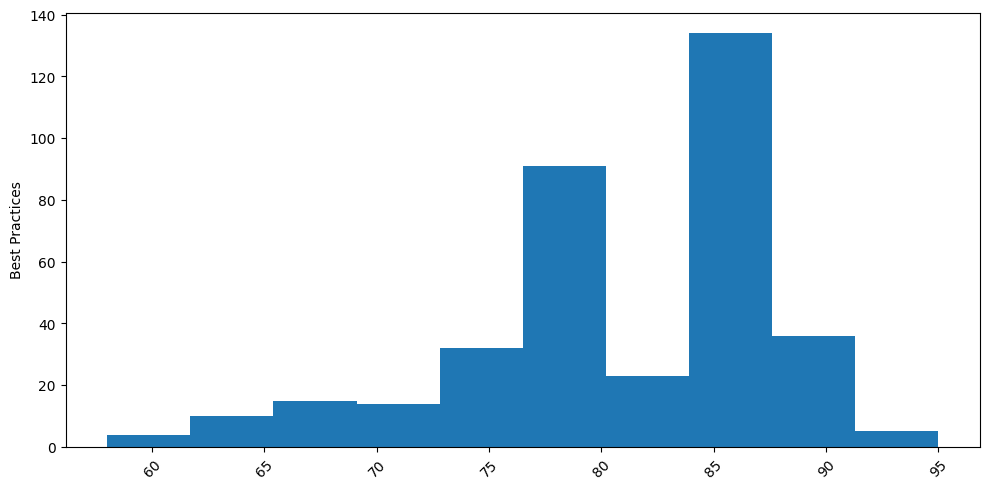

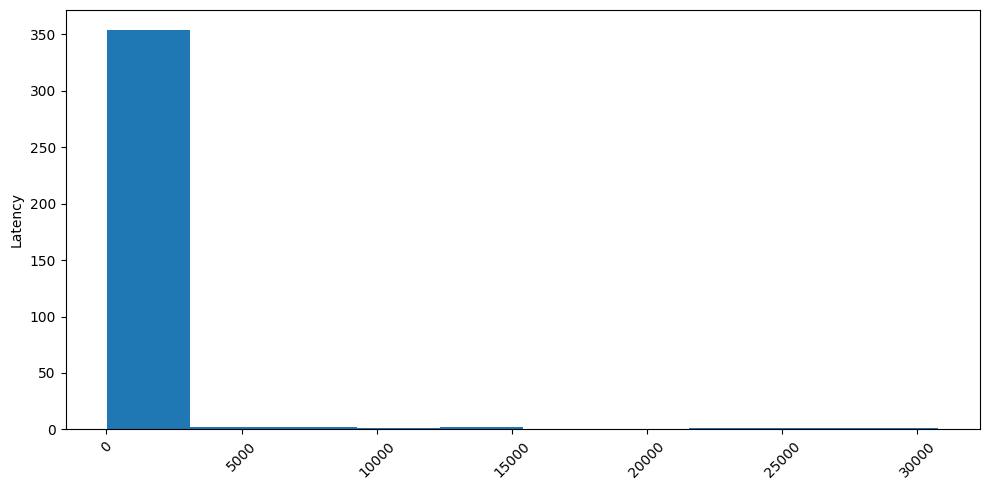

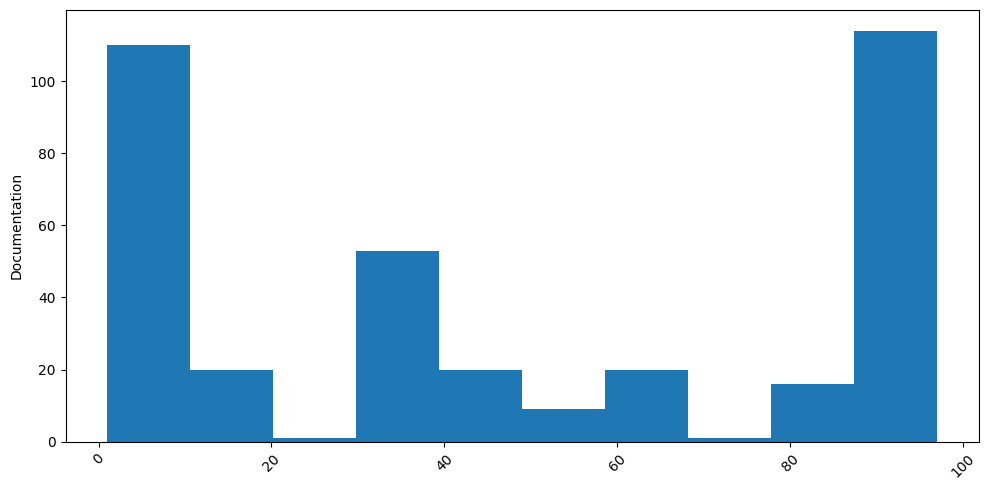

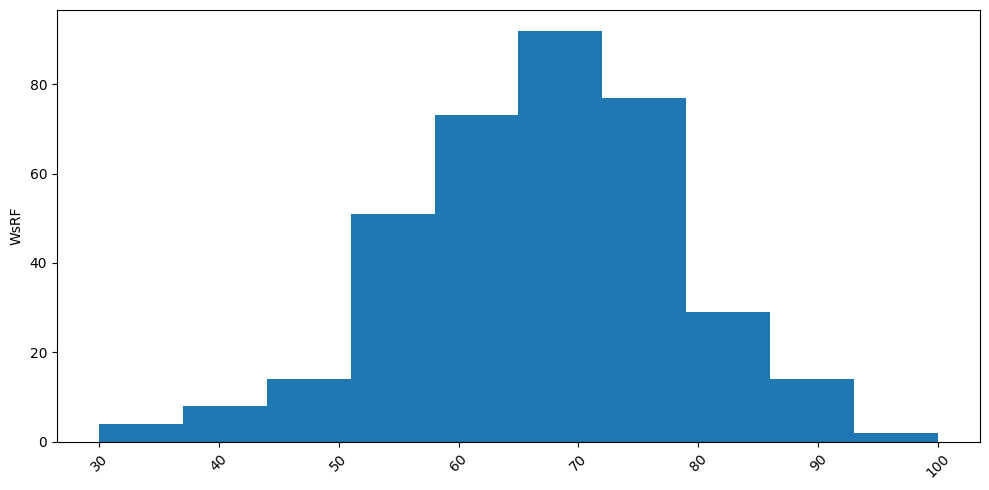

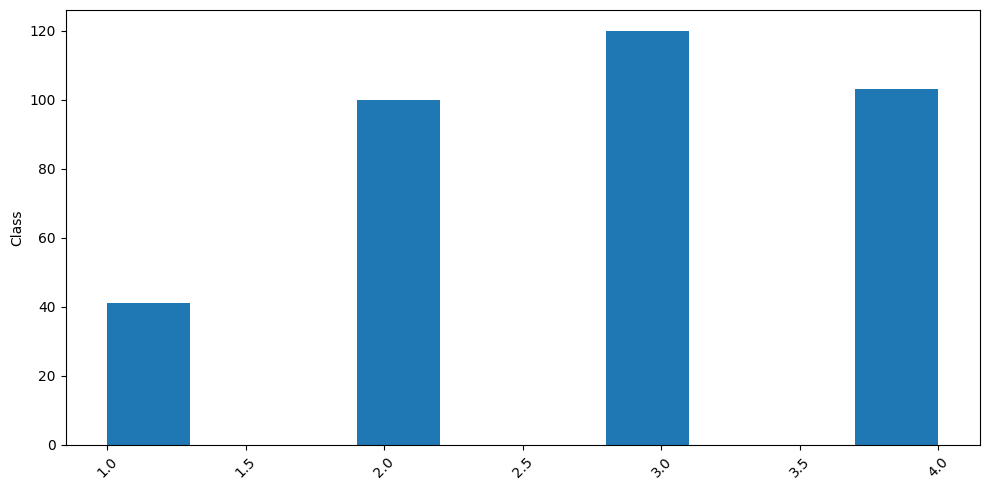

In [61]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(10, 5))
    plt.hist(df[col])
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

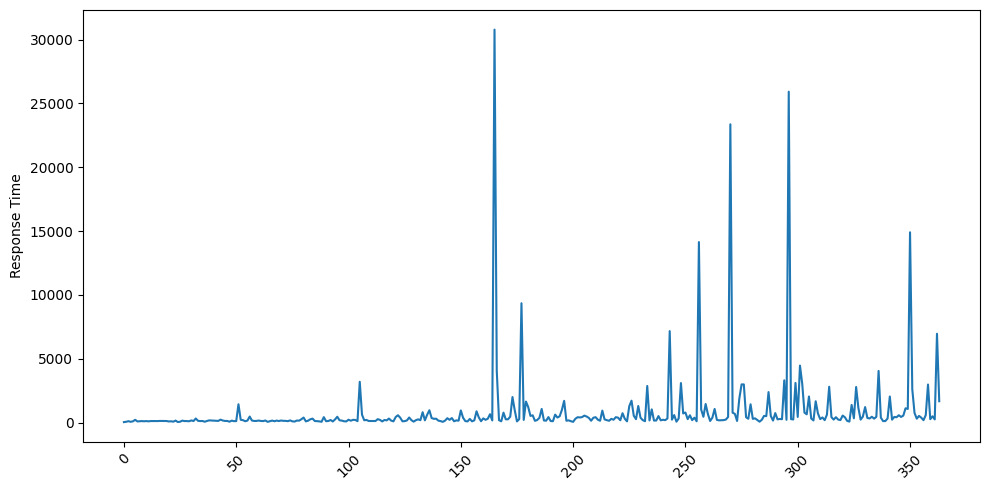

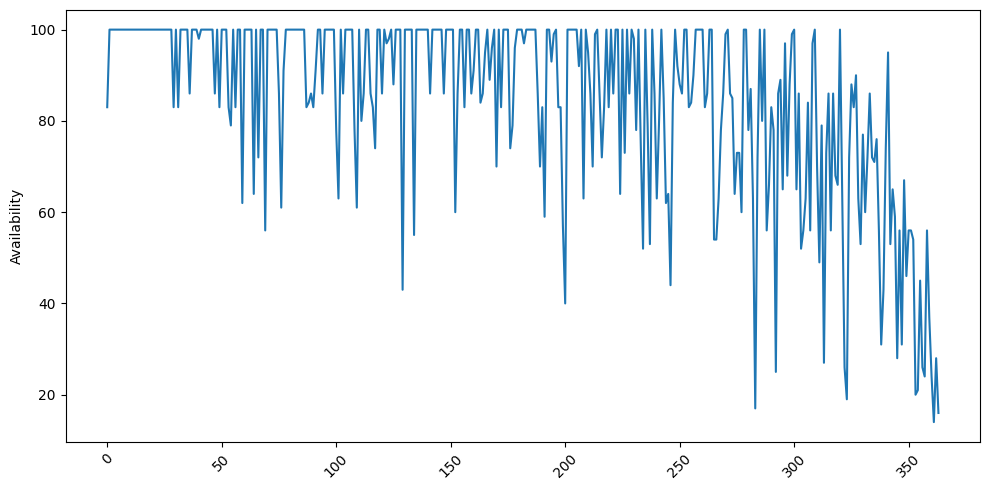

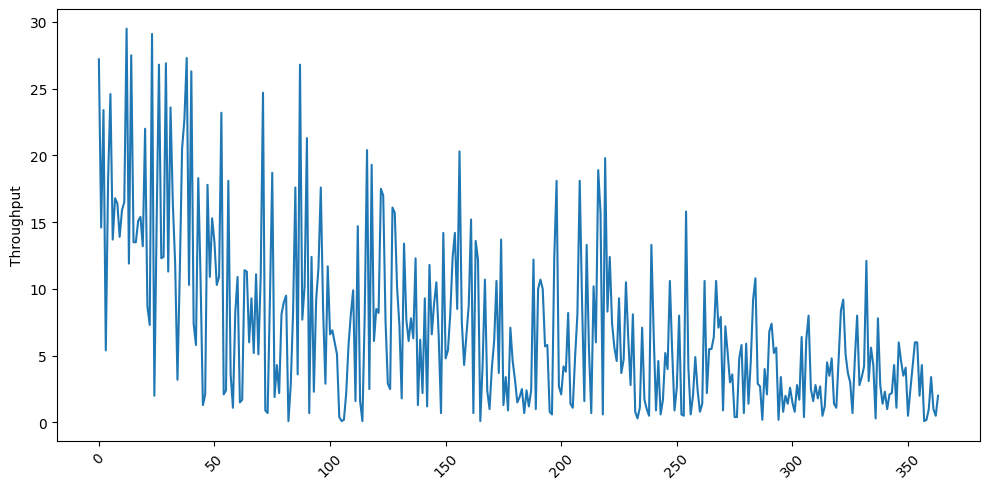

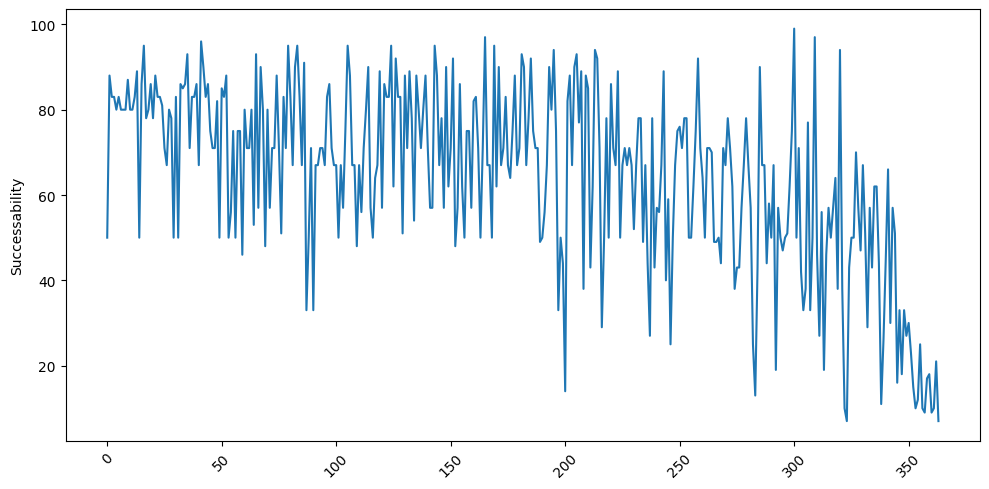

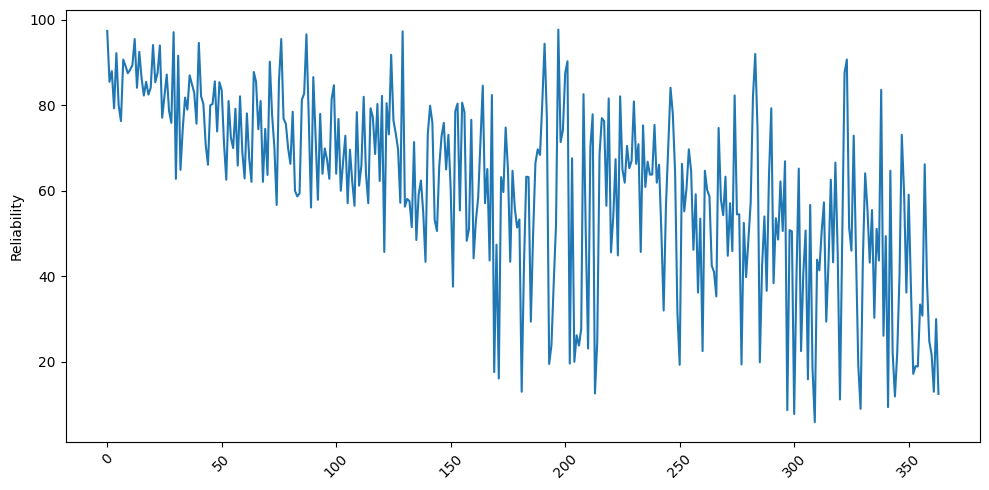

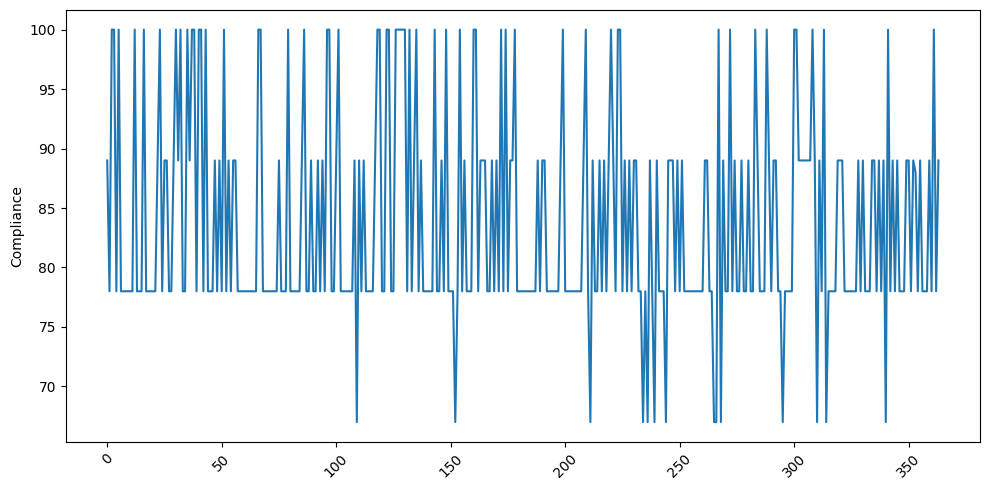

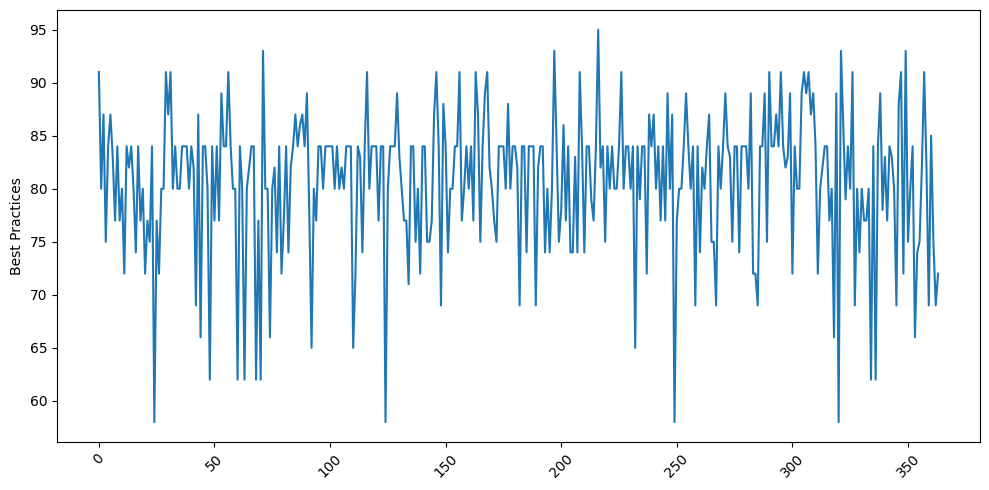

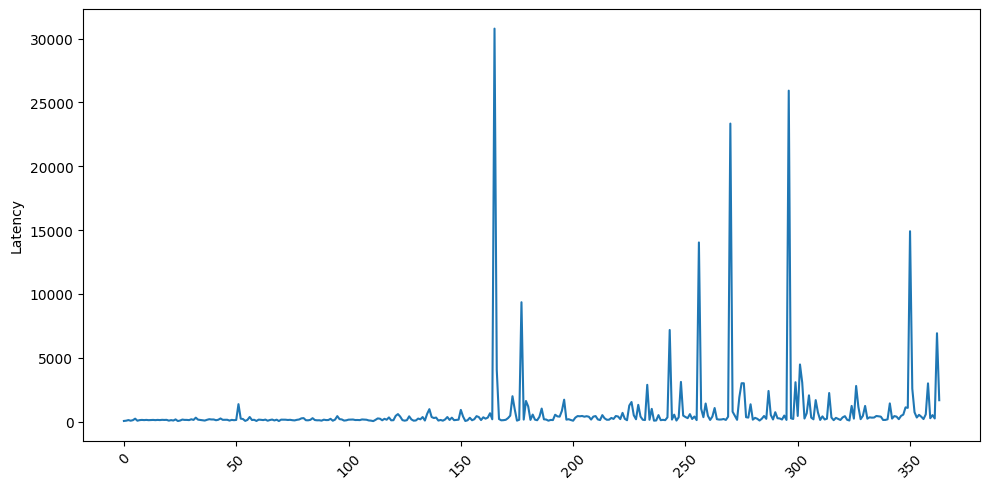

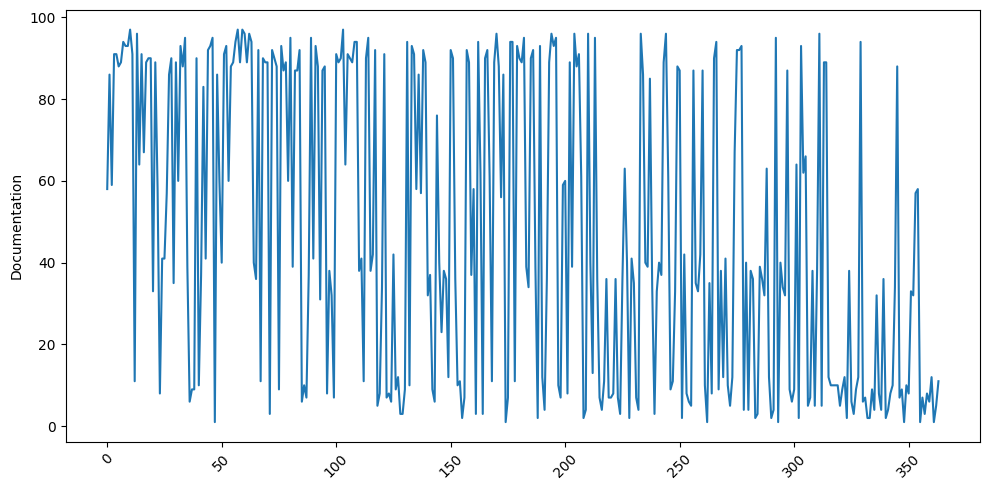

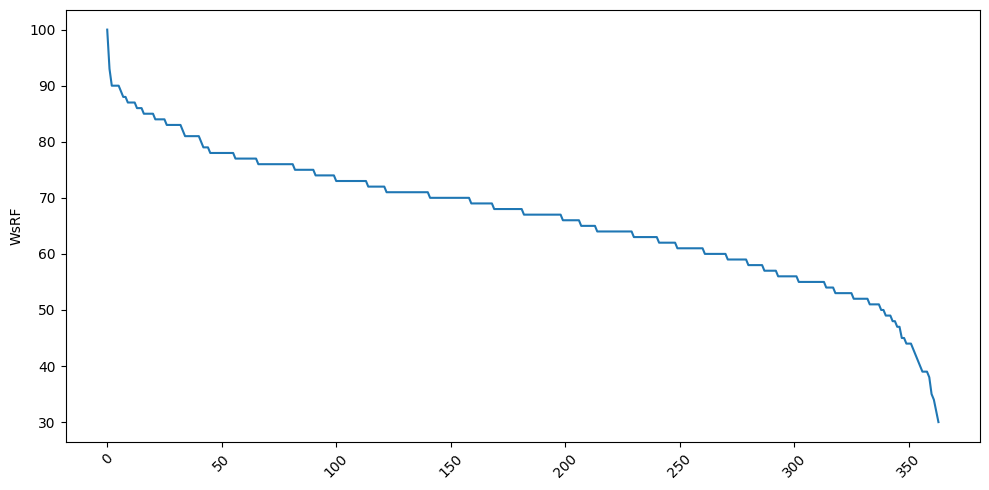

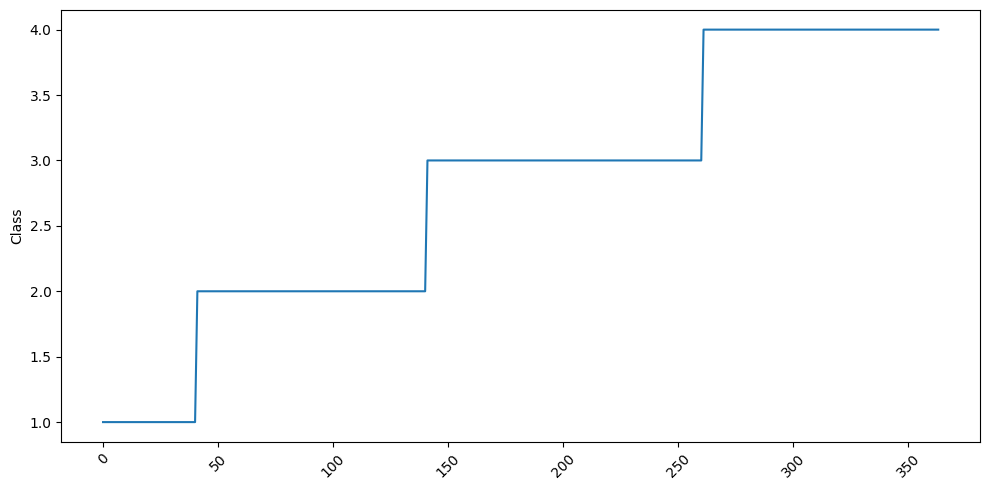

In [77]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(10, 5))
    plt.plot(df[col])
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

- Outliers

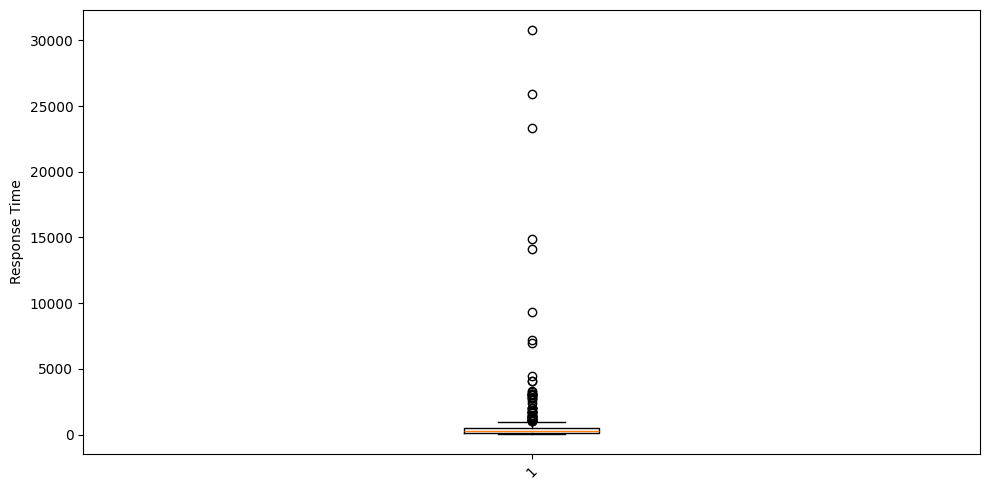

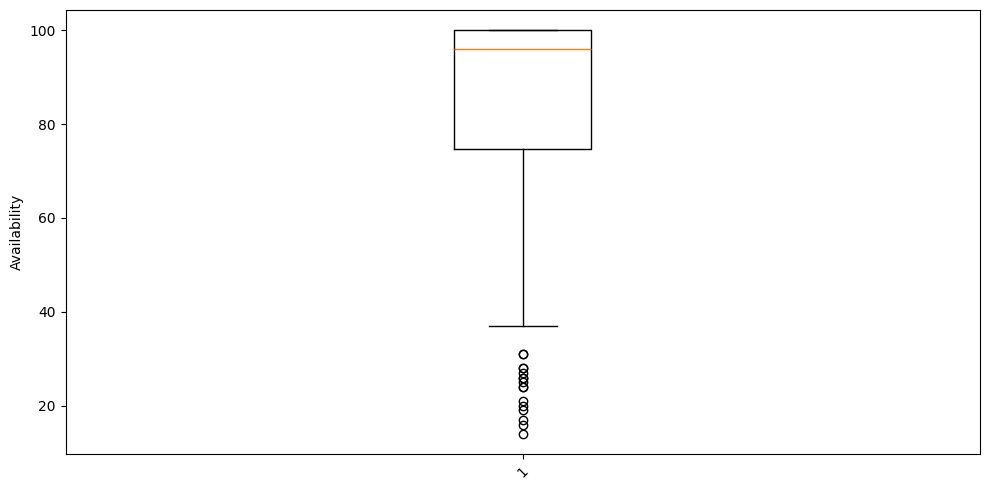

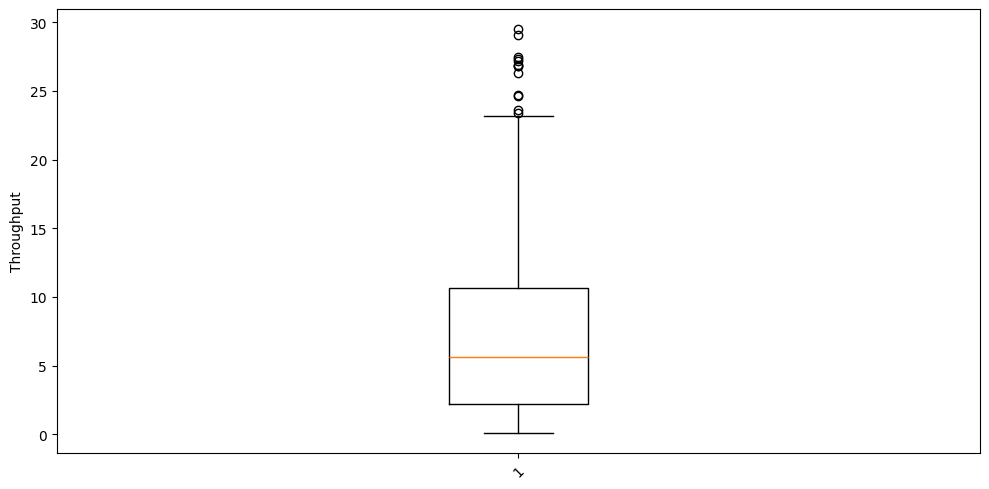

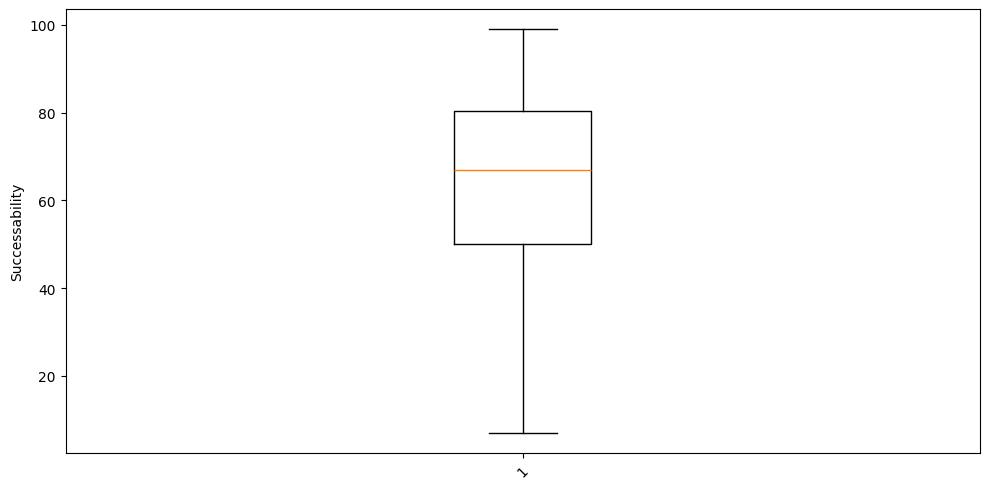

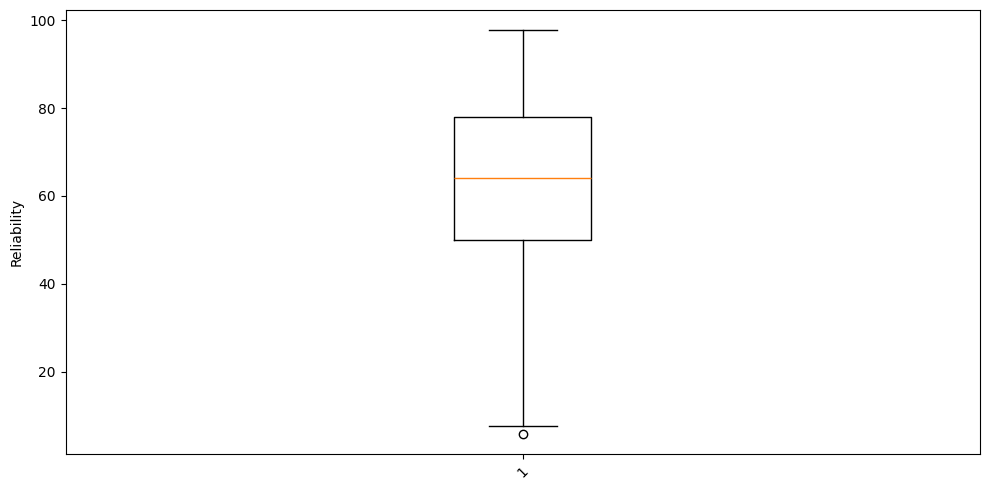

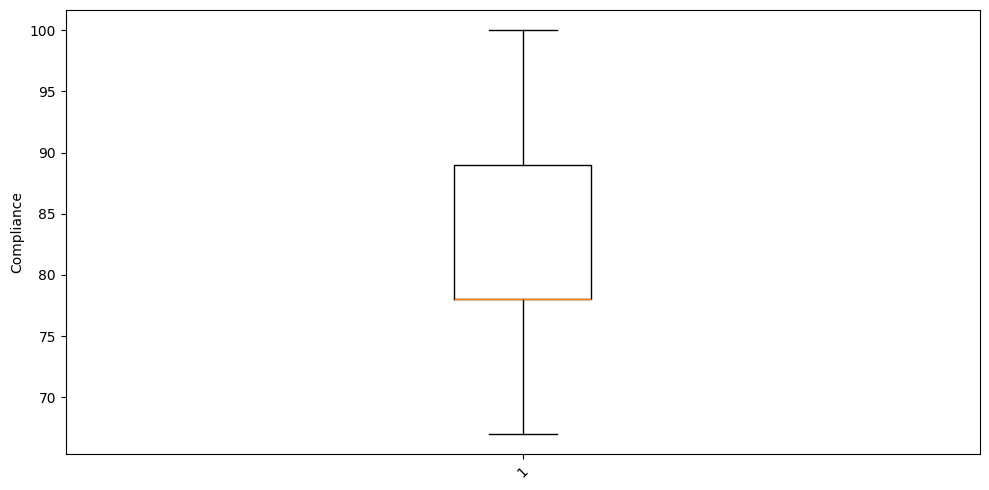

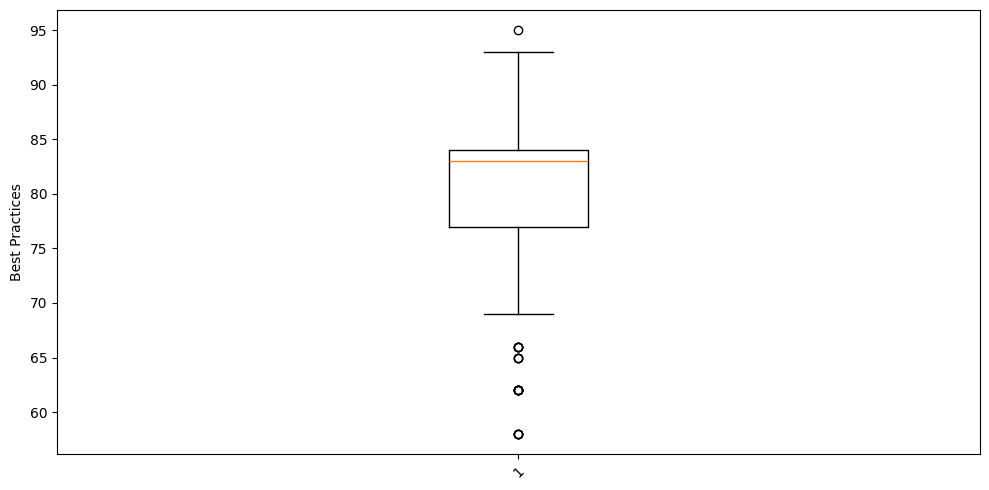

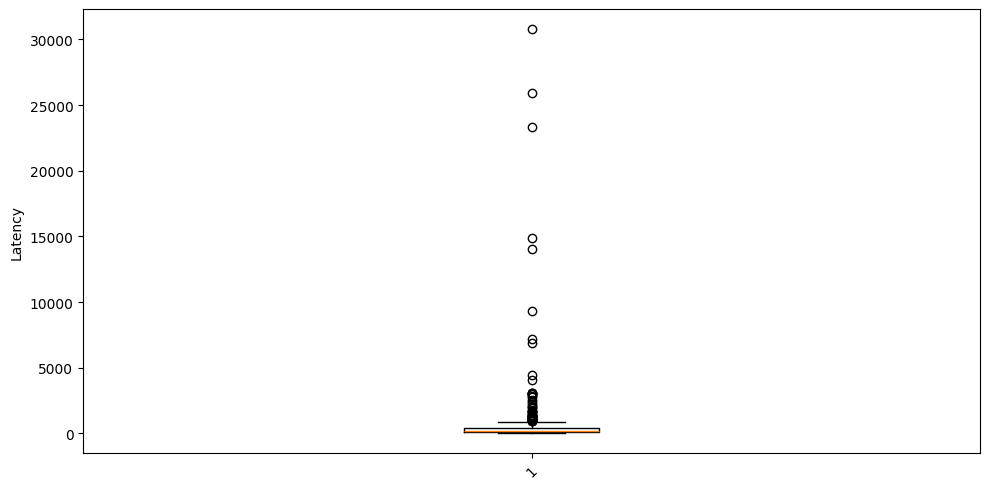

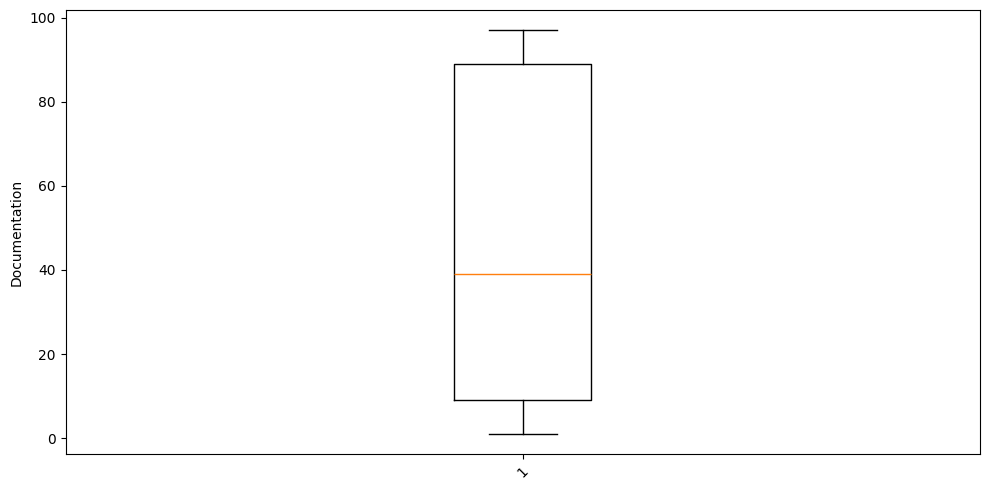

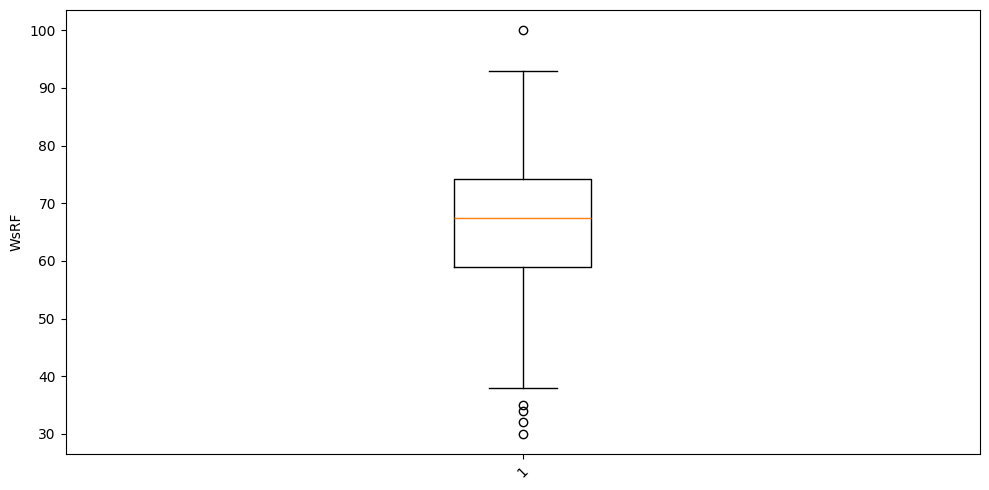

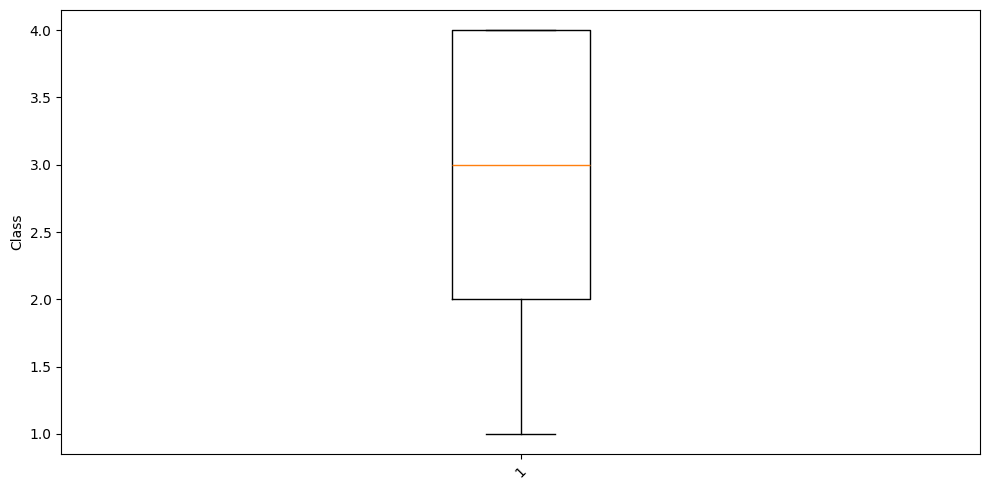

In [68]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(10, 5))
    plt.boxplot(df[col])
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [5]:
filtered_df = df.iloc[:0].copy()

for col in df.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    filtered_df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

In [6]:
filtered_df = df.copy()
threshold = 2

for col in df.select_dtypes(include=['int64', 'float64']).columns:
    mean_val = df[col].mean()
    std_val = df[col].std()
    z_scores = (df[col] - mean_val) / std_val
    mask = z_scores.abs() < threshold
    filtered_df = filtered_df[mask]

C:\Users\asaraiva\AppData\Local\Temp\ipykernel_23448\2030136587.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[mask]
C:\Users\asaraiva\AppData\Local\Temp\ipykernel_23448\2030136587.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[mask]
C:\Users\asaraiva\AppData\Local\Temp\ipykernel_23448\2030136587.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[mask]
C:\Users\asaraiva\AppData\Local\Temp\ipykernel_23448\2030136587.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[mask]
C:\Users\asaraiva\AppData\Local\Temp\ipykernel_23448\2030136587.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[mask]
C:\Users\asaraiva\AppData\Local\Temp\ipykernel_23448\2030136587.py:9: UserWarning: Boolean Series ke

C:\Users\asaraiva\AppData\Local\Temp\ipykernel_21976\861209545.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[col], filtered_df[col]], labels=['Original', 'Filtered'])


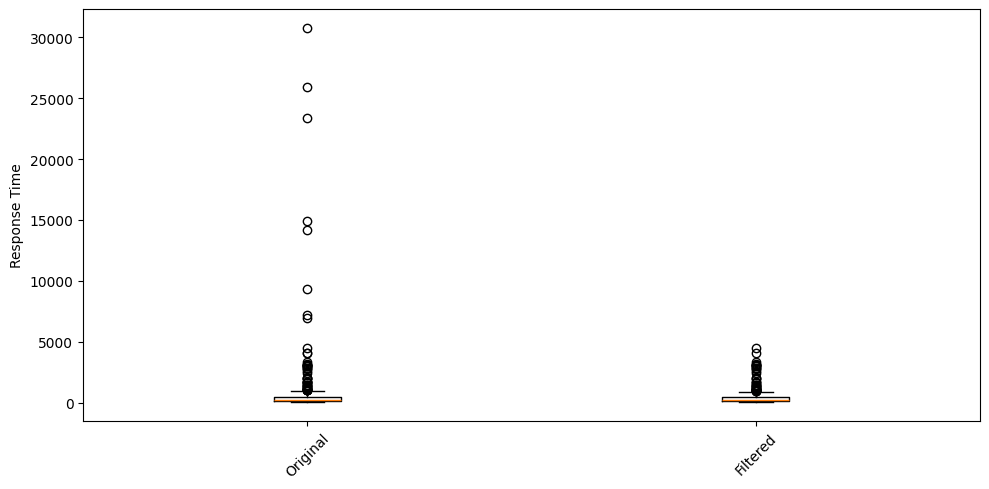

C:\Users\asaraiva\AppData\Local\Temp\ipykernel_21976\861209545.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[col], filtered_df[col]], labels=['Original', 'Filtered'])


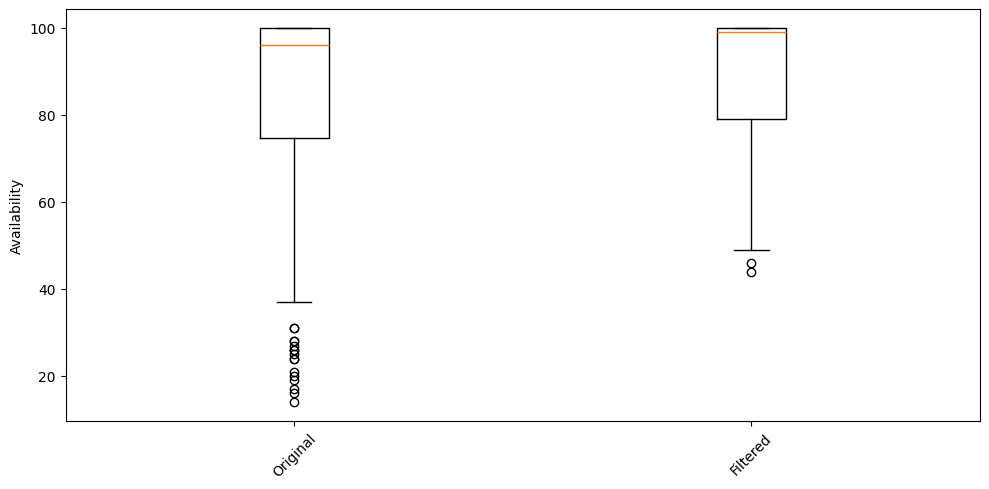

C:\Users\asaraiva\AppData\Local\Temp\ipykernel_21976\861209545.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[col], filtered_df[col]], labels=['Original', 'Filtered'])


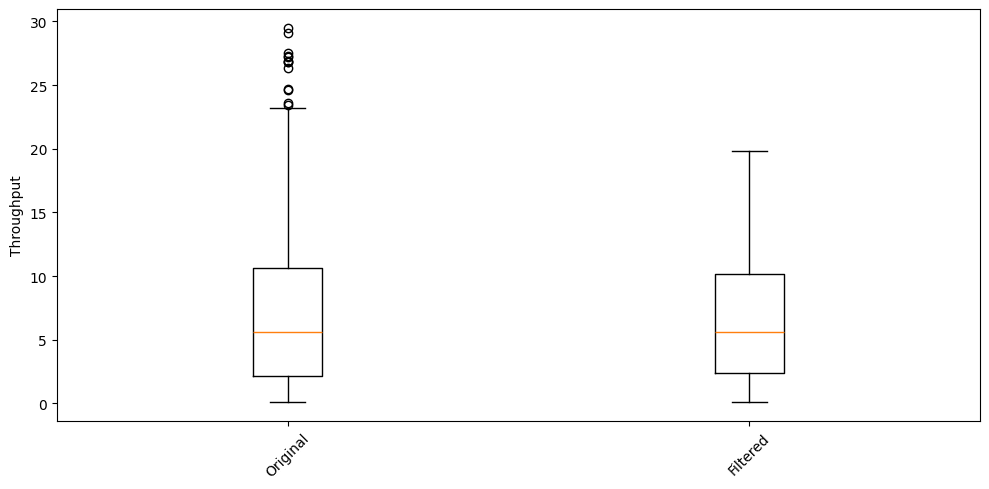

C:\Users\asaraiva\AppData\Local\Temp\ipykernel_21976\861209545.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[col], filtered_df[col]], labels=['Original', 'Filtered'])


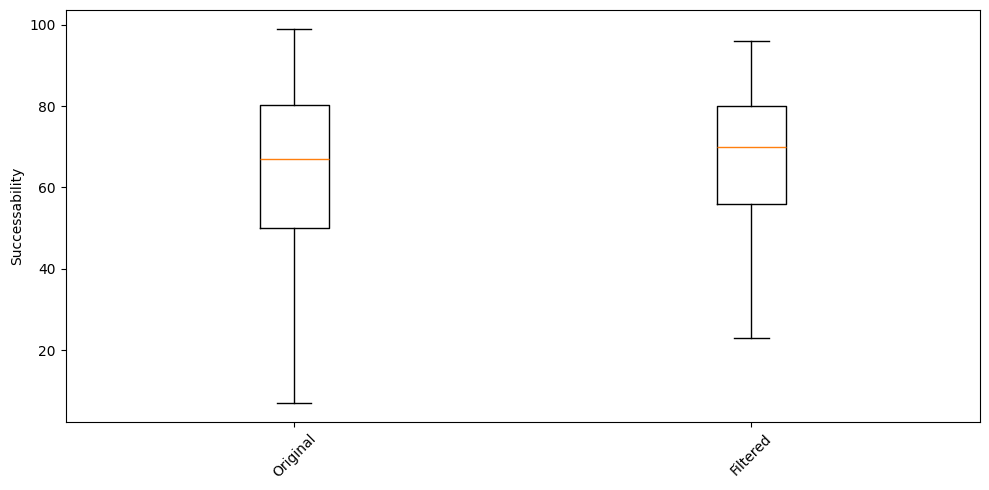

C:\Users\asaraiva\AppData\Local\Temp\ipykernel_21976\861209545.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[col], filtered_df[col]], labels=['Original', 'Filtered'])


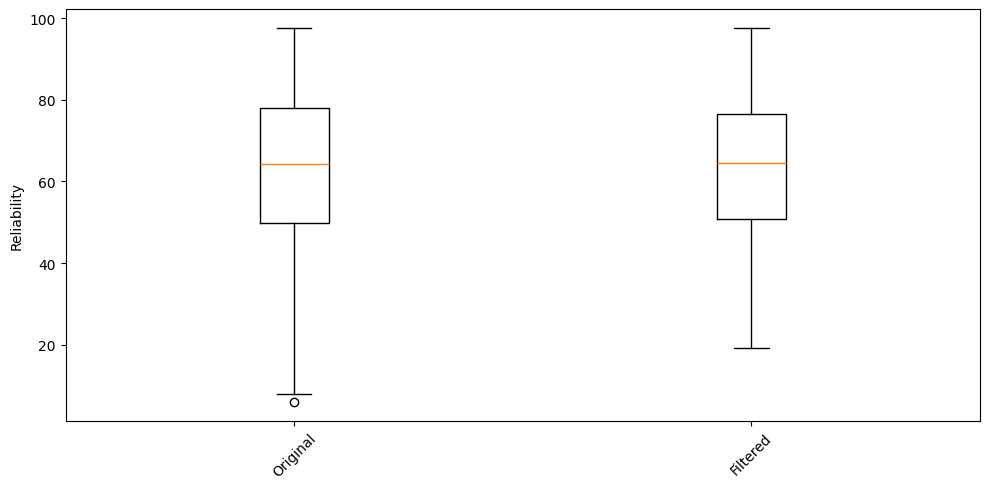

C:\Users\asaraiva\AppData\Local\Temp\ipykernel_21976\861209545.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[col], filtered_df[col]], labels=['Original', 'Filtered'])


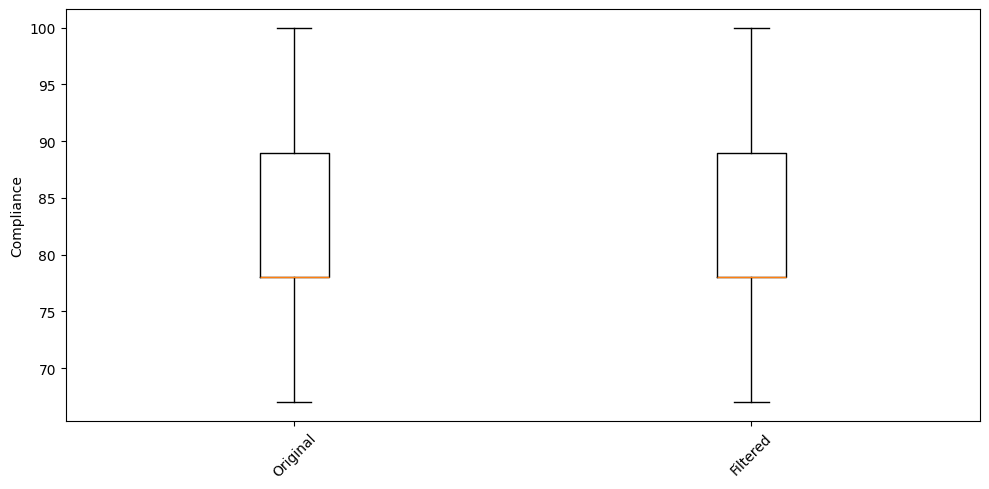

C:\Users\asaraiva\AppData\Local\Temp\ipykernel_21976\861209545.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[col], filtered_df[col]], labels=['Original', 'Filtered'])


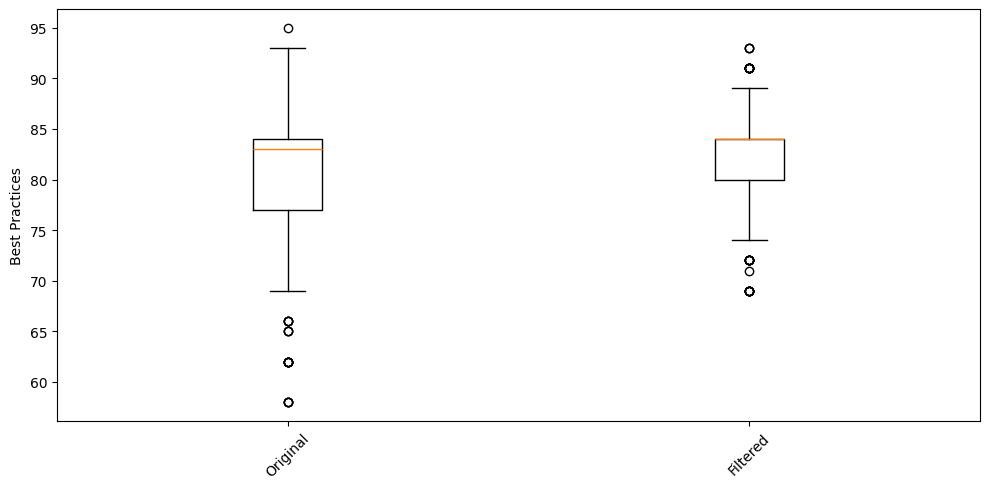

C:\Users\asaraiva\AppData\Local\Temp\ipykernel_21976\861209545.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[col], filtered_df[col]], labels=['Original', 'Filtered'])


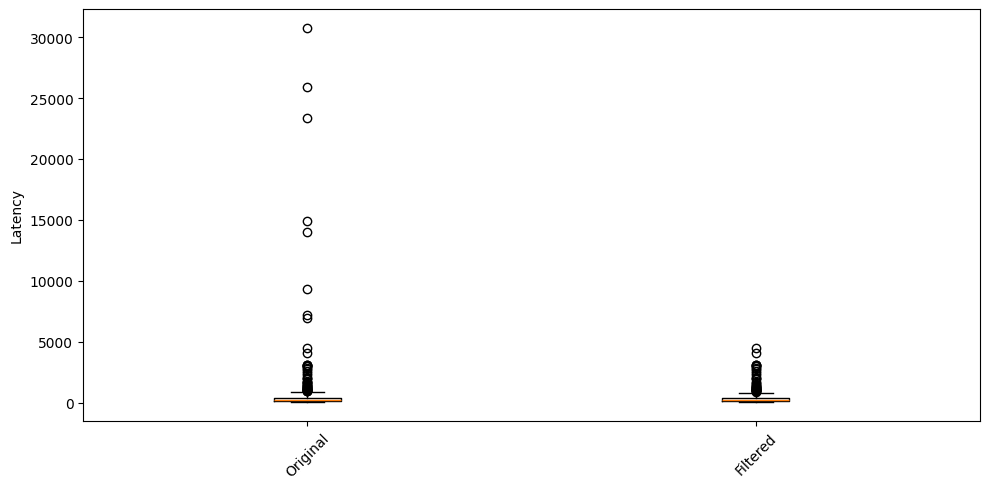

C:\Users\asaraiva\AppData\Local\Temp\ipykernel_21976\861209545.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[col], filtered_df[col]], labels=['Original', 'Filtered'])


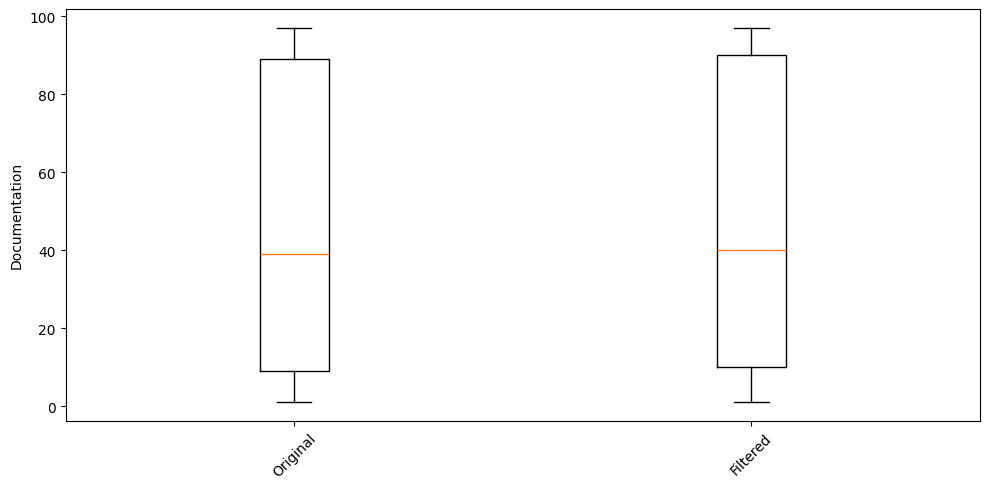

C:\Users\asaraiva\AppData\Local\Temp\ipykernel_21976\861209545.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[col], filtered_df[col]], labels=['Original', 'Filtered'])


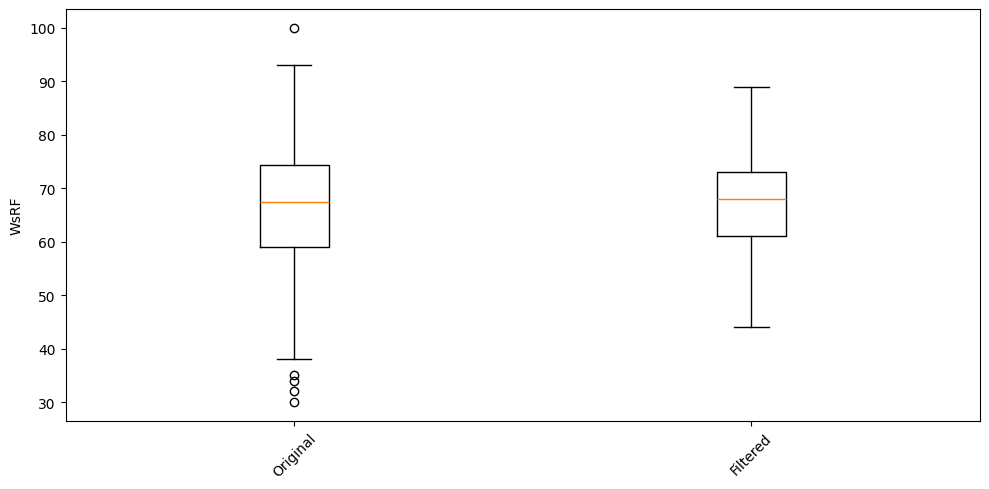

C:\Users\asaraiva\AppData\Local\Temp\ipykernel_21976\861209545.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[col], filtered_df[col]], labels=['Original', 'Filtered'])


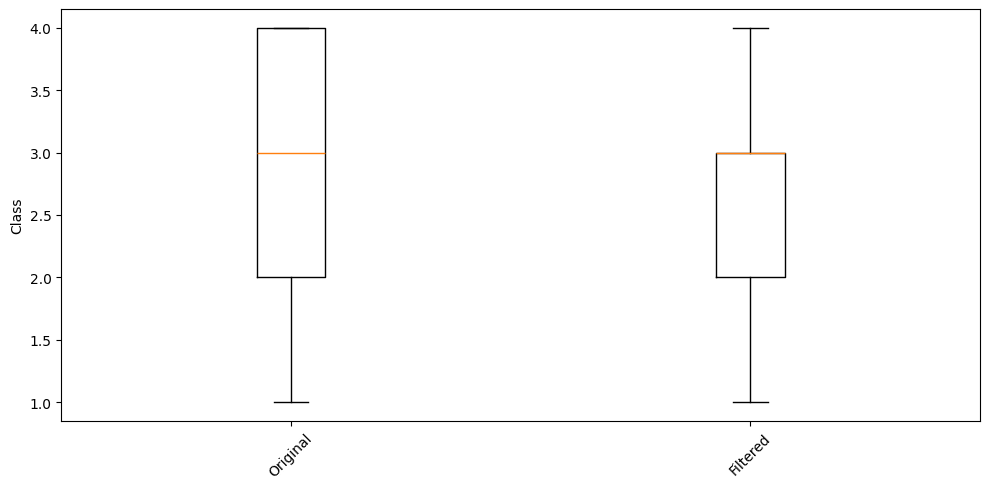

In [61]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(10, 5))
    plt.boxplot([df[col], filtered_df[col]], labels=['Original', 'Filtered'])
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

- Encoding/Removing str columns

In [9]:
filtered_df['Service Name'] = df['Service Name']

encoder = BinaryEncoder(cols=['Service Name'])
filtered_encoded_df = encoder.fit_transform(filtered_df)
filtered_encoded_df.drop(columns='WSDL Address', inplace=True)
filtered_encoded_df

,Response Time,Availability,Throughput,Successability,Reliability,Compliance,Best Practices,Latency,Documentation,WsRF,Class,Service Name_0,Service Name_1,Service Name_2,Service Name_3,Service Name_4,Service Name_5,Service Name_6,Service Name_7,Service Name_8
6,99.20,100,13.7,80,76.3,78,83,62.40,89,89,1,0,0,0,0,0,0,0,0,1
7,108.20,100,16.8,80,90.7,78,77,108.00,94,88,1,0,0,0,0,0,0,0,1,0
8,125.20,100,16.4,80,89.2,78,84,125.00,93,88,1,0,0,0,0,0,0,0,1,1
9,110.30,100,13.9,87,87.5,78,77,110.30,93,87,1,0,0,0,0,0,0,1,0,0
10,125.20,100,15.9,80,88.3,78,80,125.00,97,87,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,451.12,65,2.2,57,22.2,89,83,423.56,10,48,4,1,0,0,0,0,1,0,0,1
346,450.25,56,6.0,33,40.2,78,88,440.50,7,47,4,1,0,0,0,0,1,0,1,0
348,1126.25,67,3.5,33,59.4,78,72,1107.00,1,45,4,1,0,0,0,0,1,0,1,1
349,1075.67,46,4.1,27,36.2,89,93,1069.50,10,44,4,1,0,0,0,0,1,1,0,0


- Correlation Matrix

Higher correlation between: Response Time / Latency; Successability / Availability; Class / WsRF
Low correlation of Service Name_5, 6, 7, 8

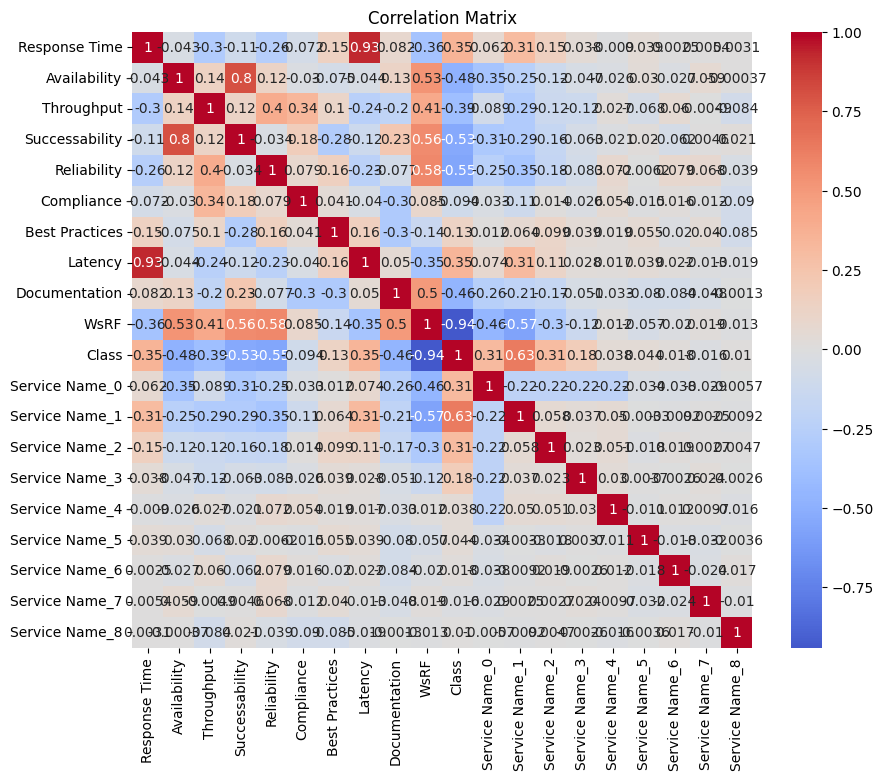

In [10]:
corr_matrix = filtered_encoded_df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


In [18]:
ratio_df = filtered_encoded_df.drop(columns=['Service Name_4','Service Name_5', 'Service Name_6', 'Service Name_7', 'Service Name_8'])

- Study ration columns

In [ ]:
ratio_df['Latency_ResponseTime'] = ratio_df['Response Time'] / ratio_df['Latency']
ratio_df['Availability_Successability'] = ratio_df['Availability'] / ratio_df['Successability']
ratio_df['Class_Wsrf'] = ratio_df['Class'] / ratio_df['WsRF']

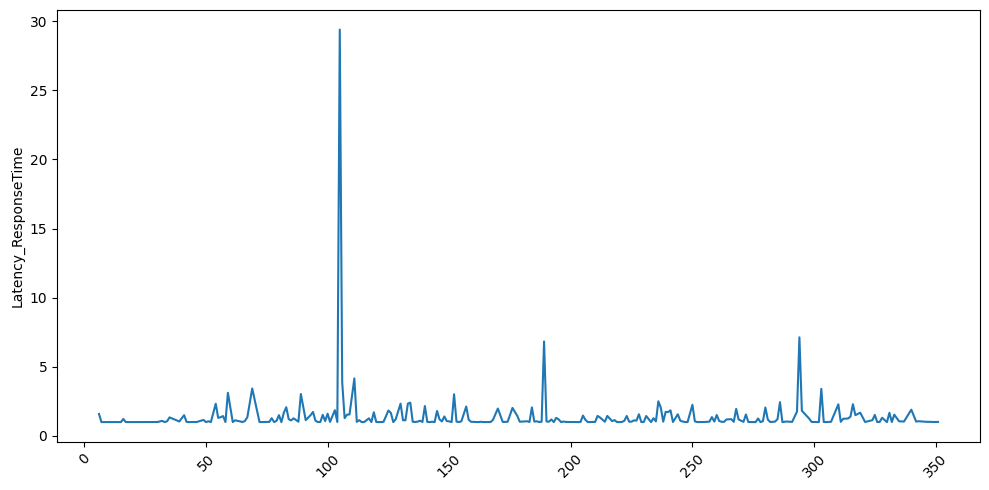

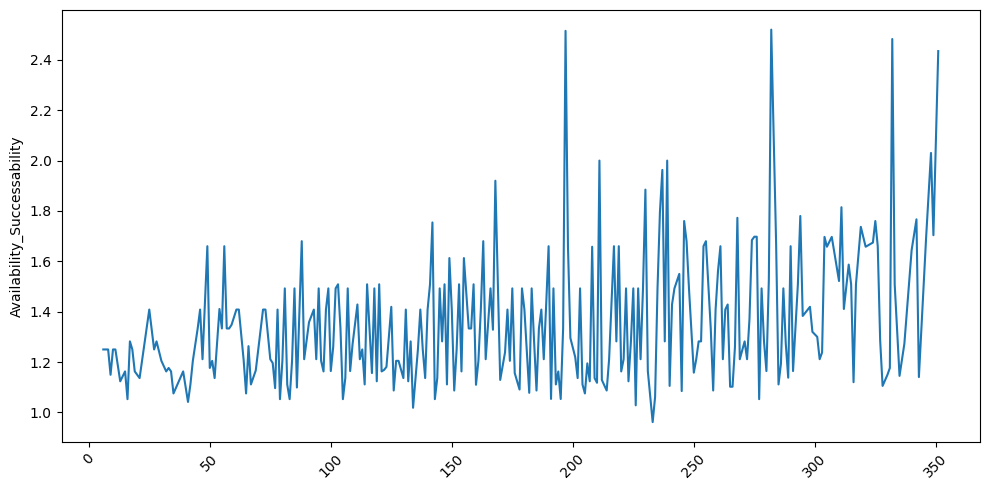

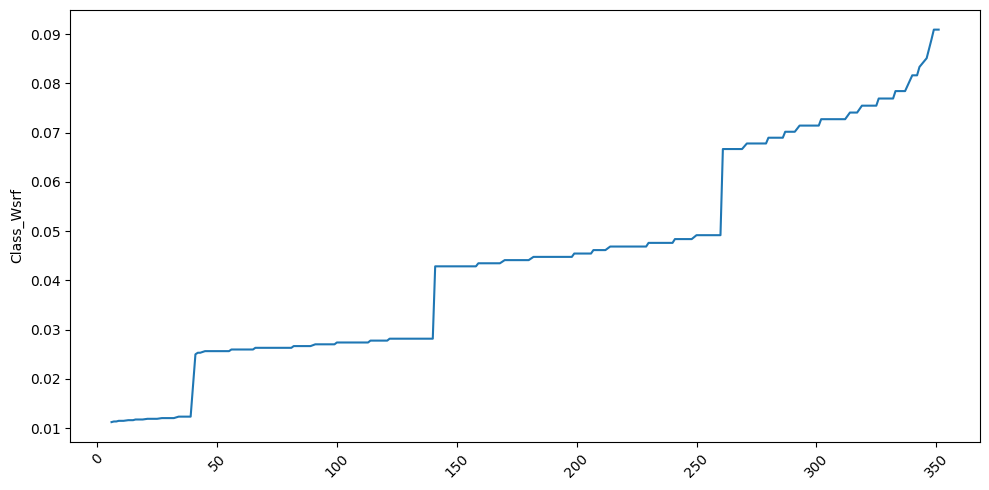

In [13]:
for col in ['Latency_ResponseTime', 'Availability_Successability', 'Class_Wsrf']:

    plt.figure(figsize=(10, 5))
    plt.plot(ratio_df[col])
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

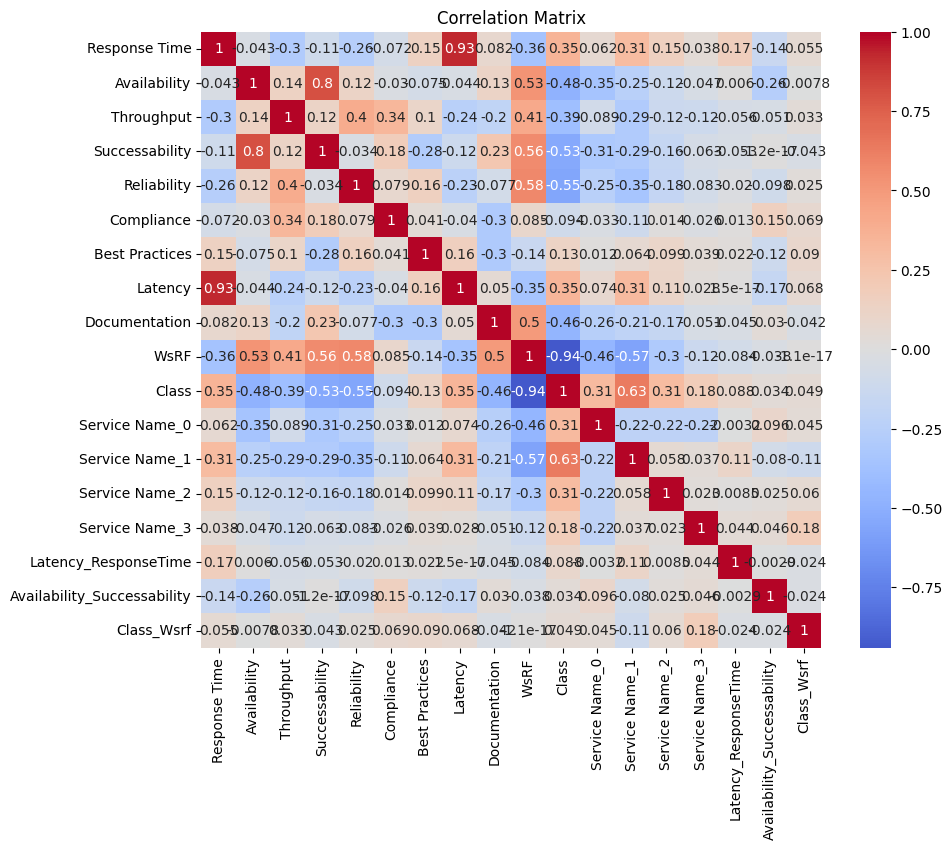

In [48]:
corr_matrix = ratio_df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


- Normalize data

In [49]:
scaled_df = filtered_encoded_df

scaler = StandardScaler()

for col in scaled_df.columns:
    scaled_df[col] = scaler.fit_transform(scaled_df[[col]])  
    print(scaled_df[col].min(), scaled_df[col].max())

scaled_df

-0.6232900468618032 5.604195604904471
-2.860208752433283 0.7969168613060643
-1.3057163033647854 2.6356402267276096
-2.591872410354322 1.692685471312066
-2.4931437821577394 2.025238206617513
-1.8405636168841761 1.9072507044524445
-2.517003053891965 2.3094594412594187
-0.608773478125742 6.075794012136513
-1.3172419764422916 1.3254710650947648
-2.5432422977436016 2.347905817080404
-1.9676497058491689 1.3564559094431146
-0.2289857133727756 4.367084676466506
-0.9412258178930583 1.0624442944398915
-0.9547589359887344 1.0473848029130144
-0.9615911471340485 1.039943018382008
-0.947970805799761 1.0548848064538696
-1.003565073696199 0.9964475909040272
-1.025229189260113 0.9753916592266354
-0.982361931792435 1.0179547554081032
-1.025229189260113 0.9753916592266354


,Response Time,Availability,Throughput,Successability,Reliability,Compliance,Best Practices,Latency,Documentation,WsRF,Class,Service Name_0,Service Name_1,Service Name_2,Service Name_3,Service Name_4,Service Name_5,Service Name_6,Service Name_7,Service Name_8
6,-0.574955,0.796917,1.415220,0.753604,0.795043,-0.591292,0.298433,-0.562226,1.105245,2.347906,-1.967650,-0.228986,-0.941226,-0.954759,-0.961591,-0.947971,-1.003565,-1.025229,-0.982362,0.975392
7,-0.562235,0.796917,2.035434,0.753604,1.622838,-0.591292,-0.908182,-0.493535,1.242886,2.239214,-1.967650,-0.228986,-0.941226,-0.954759,-0.961591,-0.947971,-1.003565,-1.025229,1.017955,-1.025229
8,-0.538209,0.796917,1.955406,0.753604,1.536609,-0.591292,0.499536,-0.467927,1.215358,2.239214,-1.967650,-0.228986,-0.941226,-0.954759,-0.961591,-0.947971,-1.003565,-1.025229,1.017955,0.975392
9,-0.559267,0.796917,1.455234,1.164452,1.438883,-0.591292,-0.908182,-0.490071,1.215358,2.130521,-1.967650,-0.228986,-0.941226,-0.954759,-0.961591,-0.947971,-1.003565,0.975392,-0.982362,-1.025229
10,-0.538209,0.796917,1.855372,0.753604,1.484872,-0.591292,-0.304874,-0.467927,1.325471,2.130521,-1.967650,-0.228986,-0.941226,-0.954759,-0.961591,-0.947971,-1.003565,0.975392,-0.982362,0.975392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,-0.077585,-1.488787,-0.885572,-0.596325,-2.314938,0.657979,0.298433,-0.018182,-1.069488,-2.108474,1.356456,4.367085,-0.941226,-0.954759,-0.961591,-0.947971,0.996448,-1.025229,-0.982362,0.975392
346,-0.078815,-2.076539,-0.125310,-2.004947,-1.280194,-0.591292,1.303946,0.007337,-1.152072,-2.217166,1.356456,4.367085,-0.941226,-0.954759,-0.961591,-0.947971,0.996448,-1.025229,1.017955,-1.025229
348,0.876579,-1.358175,-0.625482,-2.004947,-0.176467,-0.591292,-1.913695,1.011340,-1.317242,-2.434550,1.356456,4.367085,-0.941226,-0.954759,-0.961591,-0.947971,0.996448,-1.025229,1.017955,0.975392
349,0.805094,-2.729597,-0.505441,-2.357102,-1.510137,0.657979,2.309459,0.954850,-1.069488,-2.543242,1.356456,4.367085,-0.941226,-0.954759,-0.961591,-0.947971,0.996448,0.975392,-0.982362,-1.025229


- Dimentionality Reduction

In [50]:
X = scaled_df.drop(columns=['Class'])
Y = scaled_df['Class']

c:\Users\asaraiva\OneDrive - Capgemini\Documents\ROUTE25\11.1\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


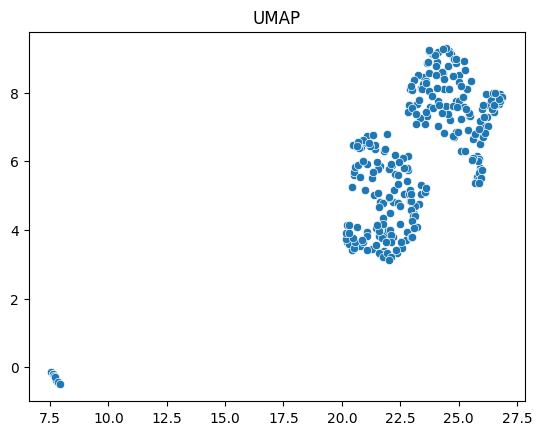

In [74]:
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X)

sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1])
plt.title("UMAP")
plt.show()

# Save

In [78]:
df_umap = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
df_umap['label'] = Y

scaled_df.to_csv('processed_data.csv',index=False)
df_umap.to_csv('data_umap.csv', index=False)

# References

Dimentionality reduction: 


https://medium.com/@adnan.mazraeh1993/a-comprehensive-guide-to-dimensionality-reduction-from-basic-to-super-advanced-techniques-19-c63858266cbd
https://medium.com/@laakhanbukkawar/pca-vs-t-sne-vs-umap-visualizing-the-invisible-in-your-data-92cb2baebdbb